In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score

In [2]:
shuju2= pd.read_excel("6.15-KNN-ANOVA-feature rank-1.1-2-100-2-L2-TOP25+5-pre300.xlsx",index_col=0)

In [3]:
shuju2_ =shuju2.copy()

In [4]:
shuju2_

,CASE_control,rs4972989,rs2295363,rs200989520,rs2223477,rs56289967,rs1554005,rs910697,rs117432374,rs765179955,...,rs1045910,rs1809914,rs780404976,rs9424680,rs2803340,rs1635031,rs10880030,rs4663,rs10785227,rs13009649
T: ID,,,,,,,,,,,,,,,,,,,,,
1,1,0.797032,-0.600530,0.797032,-0.911694,0.104015,-1.136390,0.797032,0.104015,0.104015,...,-1.312180,0.797032,-1.177420,0.104015,-1.107930,0.644720,0.371415,0.370799,0.371804,-0.826056
2,0,-1.148260,0.784447,-1.619470,0.784447,0.100585,-1.119660,0.100585,-1.481090,0.100585,...,0.100585,0.100585,-0.903234,0.100585,0.100585,0.644720,0.371415,0.370799,0.371804,-0.649117
3,0,-1.264620,-1.294560,-0.847263,0.047272,-1.378170,-0.930185,-1.171290,-0.488262,0.047272,...,0.866557,0.866557,-1.596320,0.047272,0.047272,0.644720,-2.752730,-2.760810,-2.740680,0.461070
4,0,0.793985,-1.161870,-0.954018,-1.343730,0.104101,0.793985,0.104101,-1.108650,0.104101,...,-1.257140,0.104101,-1.253610,0.104101,-1.028220,-0.379952,0.371415,0.370799,0.371804,-0.633687
5,1,0.867424,0.867424,-1.048980,-1.812770,-1.037140,-0.868842,0.105112,-1.029900,0.867424,...,-0.713945,0.867424,-1.377610,0.105112,0.867424,-0.725287,0.371415,0.370799,0.371804,-0.213265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0.622012,0.622012,-1.024290,0.266196,0.266196,-1.050590,0.266196,0.266196,0.266196,...,0.266196,0.266196,-1.599590,0.266196,0.266196,0.644720,0.371415,0.370799,0.371804,-0.790361
297,0,-1.045950,-0.962075,-0.894746,0.281950,0.281950,0.281950,0.611749,-0.787931,0.281950,...,0.281950,0.611749,-1.085890,0.281950,-1.334930,-0.842158,0.371415,0.370799,0.371804,0.461070
298,0,-0.793972,0.819136,0.819136,0.111710,-1.138240,0.111710,-1.065920,-1.053190,0.111710,...,0.111710,0.819136,-1.332930,0.111710,0.819136,-0.430023,0.371415,0.370799,0.371804,0.461070


In [5]:
FFS2 =shuju2_.drop(columns=['CASE_control'])

In [6]:
FFS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 300
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rs4972989    300 non-null    float64
 1   rs2295363    300 non-null    float64
 2   rs200989520  300 non-null    float64
 3   rs2223477    300 non-null    float64
 4   rs56289967   300 non-null    float64
 5   rs1554005    300 non-null    float64
 6   rs910697     300 non-null    float64
 7   rs117432374  300 non-null    float64
 8   rs765179955  300 non-null    float64
 9   rs6742339    300 non-null    float64
 10  rs61218502   300 non-null    float64
 11  rs78127097   300 non-null    float64
 12  rs1046934    300 non-null    float64
 13  rs17255247   300 non-null    float64
 14  rs17031614   300 non-null    float64
 15  rs2246434    300 non-null    float64
 16  rs722896     300 non-null    float64
 17  rs5855731    300 non-null    float64
 18  rs3732114    300 non-null    float64
 19  rs104591

In [7]:
target2 = shuju2_.CASE_control

In [8]:
transfer = StandardScaler()

In [9]:
tezheng2 = transfer.fit_transform(FFS2)

In [10]:
tezheng2

array([[ 1.01855994, -0.55943826,  1.67566527, ...,  0.37267825,
         0.37358649, -0.81679704],
       [-1.16746572,  1.12548863, -1.34331312, ...,  0.37267825,
         0.37358649, -0.62940046],
       [-1.2982255 , -1.40377706, -0.37858135, ..., -2.75656157,
        -2.73760751,  0.54640166],
       ...,
       [-0.76933389,  1.16769037,  1.70328019, ...,  0.37267825,
         0.37358649,  0.54640166],
       [-0.83642301,  0.96845571, -0.53102433, ...,  0.37267825,
         0.37358649,  0.54640166],
       [ 0.79334993, -1.25073206, -0.48208481, ...,  0.37267825,
         0.37358649,  0.54640166]])

In [109]:
sss2 = ShuffleSplit(n_splits=50, test_size=0.1,random_state=99)


In [110]:
CCs = np.logspace(-3,3,1000)

In [111]:
acc_=[]
coeff_ = []
for C_ in CCs:
    LJ_2 = LogisticRegression(penalty='l2',C = C_, solver='liblinear', max_iter=1000)
    LJ_2.fit(tezheng2, target2)
    coeff_.append(LJ_2.coef_)
    score = cross_val_score(LJ_2, tezheng2, target2, cv=sss2)
    acc_.append(score.mean())

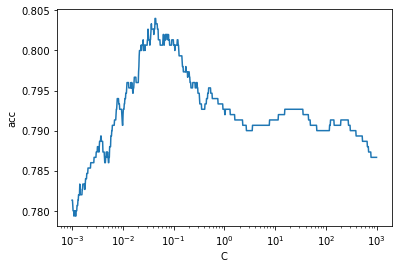

In [112]:
import matplotlib.pyplot as plt
plt.plot(CCs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

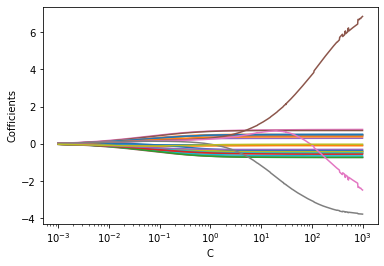

In [113]:
coeff_ = np.array(coeff_).reshape(1000,29)
plt.plot(CCs, coeff_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

In [114]:
np.argmax(acc_)

272

In [115]:
CCs[272]

0.04301635758106795

In [116]:
LJ2=LogisticRegression(penalty='l2',C =
0.04301635758106795, solver='liblinear').fit(tezheng2, target2)

In [117]:
 score2 = cross_val_score(LJ2, tezheng2, target2, cv=sss2)

In [118]:
 score2

array([0.66666667, 0.83333333, 0.76666667, 0.86666667, 0.73333333,
       0.73333333, 0.76666667, 0.83333333, 1.        , 0.83333333,
       0.73333333, 0.8       , 0.8       , 0.83333333, 0.86666667,
       0.9       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.73333333, 0.73333333, 0.83333333, 0.83333333, 0.86666667,
       0.7       , 0.8       , 0.8       , 0.76666667, 0.83333333,
       0.76666667, 0.73333333, 0.76666667, 0.9       , 0.83333333,
       0.83333333, 0.76666667, 0.8       , 0.83333333, 0.86666667,
       0.86666667, 0.73333333, 0.7       , 0.8       , 0.73333333,
       0.76666667, 0.93333333, 0.83333333, 0.86666667, 0.8       ])

In [119]:
LJ2.coef_

array([[-0.0581693 , -0.1233683 , -0.2016236 , -0.21845928,  0.13296863,
        -0.33403769,  0.36111065, -0.27319652, -0.16305744, -0.28947814,
        -0.00766242,  0.26310149,  0.23017366, -0.25003787,  0.20648886,
         0.33181115,  0.26144128,  0.25531888, -0.20964062, -0.19556217,
         0.23552925,  0.17844134, -0.31137505, -0.23482097, -0.1781025 ,
         0.1470154 ,  0.14279447,  0.13451548, -0.12089461]])

In [120]:
LJ2.score(tezheng2,target2)

0.84

In [121]:
score2.mean()

0.8039999999999999

In [125]:
shuju23= pd.read_excel("6.15-KNN-ANOVA-feature rank-1.1-2-100-2-L2-TOP25+5-val100.xlsx",index_col=0)

In [126]:
shuju23_ =shuju23.copy()

In [127]:
shuju23_

,CASE_control,rs4972989,rs2295363,rs200989520,rs2223477,rs56289967,rs1554005,rs910697,rs117432374,rs765179955,...,rs1045910,rs1809914,rs780404976,rs9424680,rs2803340,rs1635031,rs10880030,rs4663,rs10785227,rs13009649
T: ID,,,,,,,,,,,,,,,,,,,,,
301,1,0.592450,-1.087520,-1.135330,0.592450,0.296027,-1.292130,0.296027,-1.133820,0.296027,...,-0.695606,0.592450,0.296027,0.296027,-1.098620,0.644720,0.371415,0.370799,0.371804,-0.812325
302,1,0.618102,-1.165040,-0.826765,-0.924132,0.244383,-1.389630,0.618102,-0.917108,0.244383,...,-1.240550,0.618102,0.244383,0.244383,-0.779546,0.644720,0.371415,0.370799,0.371804,-0.682749
303,1,-0.972725,0.299080,-0.588742,0.609006,-0.955605,-1.285730,0.299080,-1.283570,0.609006,...,0.299080,0.609006,-0.697579,0.299080,0.299080,-0.858487,0.371415,0.370799,0.371804,-0.659518
304,0,-0.813759,0.590402,-0.938912,0.590402,0.284165,-0.621072,0.284165,-1.076960,0.284165,...,-1.240660,0.284165,-0.898875,0.284165,0.284165,0.644720,0.371415,0.370799,0.371804,-0.103177
305,1,-0.923779,0.806745,-1.519330,0.094088,0.094088,0.094088,-0.763831,-0.601858,0.094088,...,0.094088,0.806745,0.094088,0.094088,0.806745,-0.907750,0.371415,0.370799,0.371804,-0.478601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,0.617628,-1.428120,-1.145220,0.257355,0.257355,-1.326620,0.257355,-1.400360,0.257355,...,0.257355,0.617628,-1.167910,-0.787753,-1.438870,-0.706704,0.371415,0.370799,0.371804,0.461070
397,0,0.591287,-0.786613,0.591287,0.265615,-0.962933,0.265615,0.591287,-0.352065,0.265615,...,0.265615,0.591287,-1.065500,-1.270550,-1.311580,-0.564158,0.371415,0.370799,0.371804,0.461070
398,1,0.263604,-0.598090,-0.949041,0.636431,-1.193210,0.263604,-0.985768,-1.200120,0.263604,...,-0.845770,0.636431,-1.282160,-1.108430,-1.154250,-1.010590,0.371415,0.370799,0.371804,-0.691875


In [128]:
FFS23 =shuju23_.drop(columns=['CASE_control'])

In [129]:
FFS23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 301 to 400
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rs4972989    100 non-null    float64
 1   rs2295363    100 non-null    float64
 2   rs200989520  100 non-null    float64
 3   rs2223477    100 non-null    float64
 4   rs56289967   100 non-null    float64
 5   rs1554005    100 non-null    float64
 6   rs910697     100 non-null    float64
 7   rs117432374  100 non-null    float64
 8   rs765179955  100 non-null    float64
 9   rs6742339    100 non-null    float64
 10  rs61218502   100 non-null    float64
 11  rs78127097   100 non-null    float64
 12  rs1046934    100 non-null    float64
 13  rs17255247   100 non-null    float64
 14  rs17031614   100 non-null    float64
 15  rs2246434    100 non-null    float64
 16  rs722896     100 non-null    float64
 17  rs5855731    100 non-null    float64
 18  rs3732114    100 non-null    float64
 19  rs1045

In [130]:
target23 = shuju23_.CASE_control

In [131]:
transfer = StandardScaler()

In [132]:
tezheng23 = transfer.fit_transform(FFS23)

In [133]:
tezheng23

array([[ 1.07734754, -0.9726091 , -0.79626157, ...,  0.36700386,
         0.36830694, -0.86362251],
       [ 1.10949469, -1.06471991, -0.42438459, ...,  0.36700386,
         0.36830694, -0.74906506],
       [-0.88413323,  0.67497667, -0.13752356, ...,  0.36700386,
         0.36830694, -0.72852666],
       ...,
       [ 0.66523701, -0.39105862, -0.57174942, ...,  0.36700386,
         0.36830694, -0.75713331],
       [-0.8424442 , -0.37870351, -0.84343239, ..., -2.78773488,
        -2.76388288, -0.8559132 ],
       [ 0.40688123,  1.3097499 ,  1.57629826, ...,  0.36700386,
         0.36830694,  0.26217913]])

In [134]:
test_predict = LJ2.predict(tezheng23)
test_predict

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [135]:
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score
import seaborn as sns

In [136]:
confusion_matrix(target23,test_predict )

array([[37, 13],
       [16, 34]], dtype=int64)

In [137]:
y_score = LJ2.decision_function(tezheng23)

In [138]:
fpr, tpr, thresholds = roc_curve(target23, y_score)

In [139]:
auc_ = auc(fpr, tpr)
auc_

0.7968000000000001

In [140]:
accuracy_score(target23,test_predict)

0.71

In [141]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


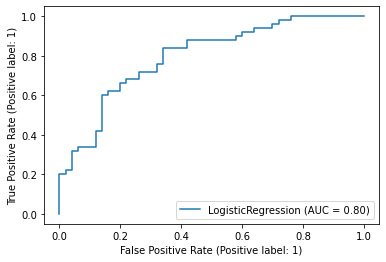

In [142]:
plot_roc_curve(LJ2, tezheng23, target23)